# Assigment 04: Due 10/1

You can use these imports

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [54]:
def f(x):
    return 2*(4+x**2)**(-3/2)

xarr=np.linspace(0,2,10000)
print("maximum y value in bounds:", max(f(xarr)))

x_rand = 0 + (2 - 0)*np.random.random(10000)
y_rand = np.random.random(10000)*max(f(xarr))
below = np.where(y_rand < f(x_rand))
above = np.where(y_rand >= f(x_rand))

ratio = float(len(below[0])/10000)
area = (2-0)*max(f(xarr))
integral = ratio*area
print(' ratio: {0}\n area: {1}\n integral: {2}\n'.format(ratio,area,integral))

maximum y value in bounds: 0.25
 ratio: 0.709
 area: 0.5
 integral: 0.3545



# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

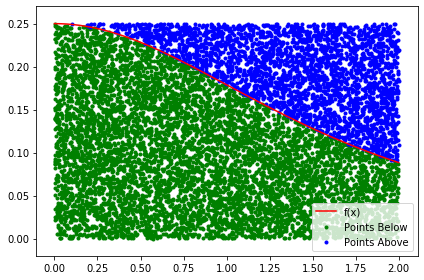

In [19]:
fig = plt.figure('MC Integration')
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(xarr, f(xarr), color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


Text(0, 0.5, 'Number of particles')

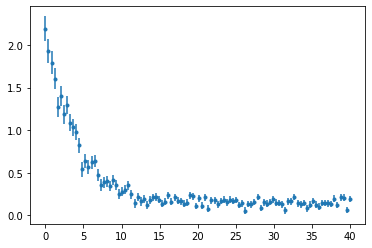

In [48]:
time=np.loadtxt('decay_data.txt', usecols=0, skiprows=0,dtype ='float')
particles=np.loadtxt('decay_data.txt', usecols=1, skiprows=0,dtype ='float')
unc= np.loadtxt('decay_data.txt', usecols=2, skiprows=0,dtype ='float')

fig2 = plt.figure()
plt.errorbar(time, particles, unc, fmt='.');
ax=fig.add_axes([0.8,0.8,0.8,0.8])
ax.set_xlabel('Time(s)')
ax.set_ylabel('Number of particles')


# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [92]:
def decay(t,p0,p1,p2):
    return p0*np.exp((-1*t)/p1)+p2
decay(1,1,1,1)



init_par = np.array([1,1,1])
#Need sigma
def get_chi_squared(x, y, sigma, params):
    '''Returns the chi squared of the fit'''
    RR = 0.0
    #print(sigma)
    for i in range(len(x)):# for each x input...
        y_prime =decay(x[i],params[0],params[1],params[2])
        RR = RR + ( (y[i] - y_prime)/sigma)**2
    return RR 

print( "first sample chi square",get_chi_squared(time,particles,1,init_par))

first sample chi square 56.9512400035894


In [96]:
N = 10000
par_list, RRs = [init_par], [get_chi_squared(time, particles, 1, init_par)]

for i in range (N):
    try:
        test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5),np.random.normal(par_list[-1][2],0.5)]
        RR_test = get_chi_squared(time,particles,1,test_par)
        t = (np.random.random() <= (RRs[-1])/RR_test )
    except OverFlowError:
        filller=1
    if t:
        #add new value to array
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        #add value of array
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    


RR_min = np.amin(RRs) #find min R2
chisq = RR_min
best_i = RRs.index(RR_min) #Get the index
best_pars = par_list[best_i]  #get the parameters  
print("best p0 = {0}, best p1 = {1}, best p2 ={2} chi**2 = {3}, loc = {4}".format(best_pars[0], best_pars[1],best_pars[2], RR_min, best_i) ) 
   

C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


best p0 = 2.0871692658612147, best p1 = 3.740389424568195, best p2 =0.1293305379110365 chi**2 = 0.36068023213957195, loc = 764


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [102]:
dof = len(time) - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

 chi2 =  0.36068023213957195 
 dof =  96 
 reduced chi2 =  0.0037570857514538747 
 p-value =  1.0


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


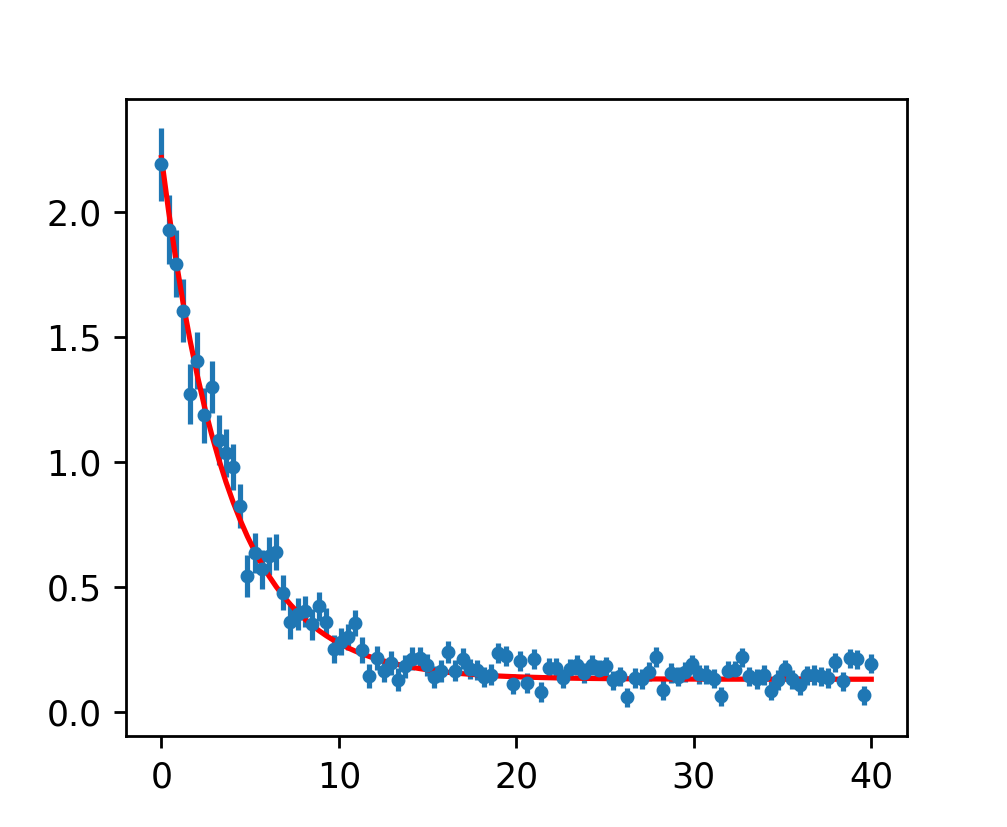

C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


In [101]:

fig2 = plt.figure()
plt.errorbar(time, particles, unc, fmt='.',label='uncertainty');
plt.plot(time, decay(time,best_pars[0],best_pars[1],best_pars[2]), color = "red", label= 'fit function')
ax=fig.add_axes([0.8,0.8,0.8,0.8])
ax.set_xlabel('Time(s)')
ax.set_ylabel('Number of particles')
ax.legend();


# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


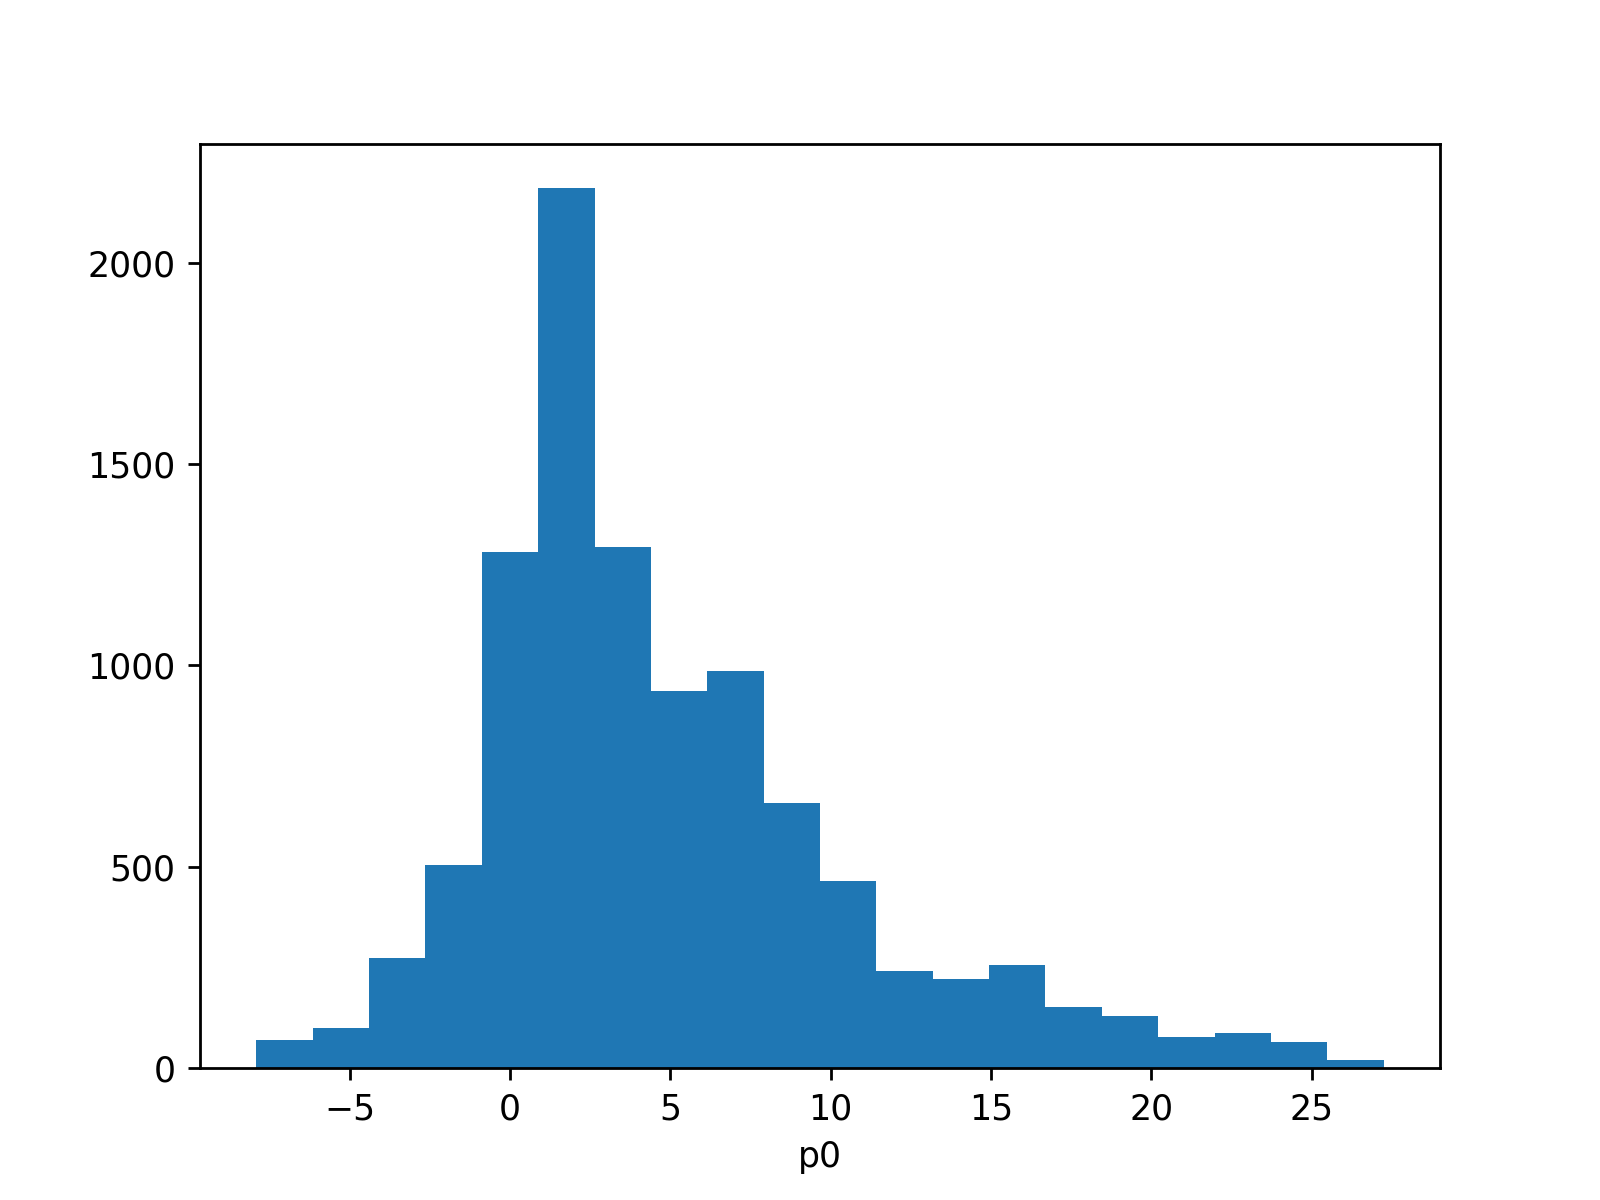

<IPython.core.display.Javascript object>


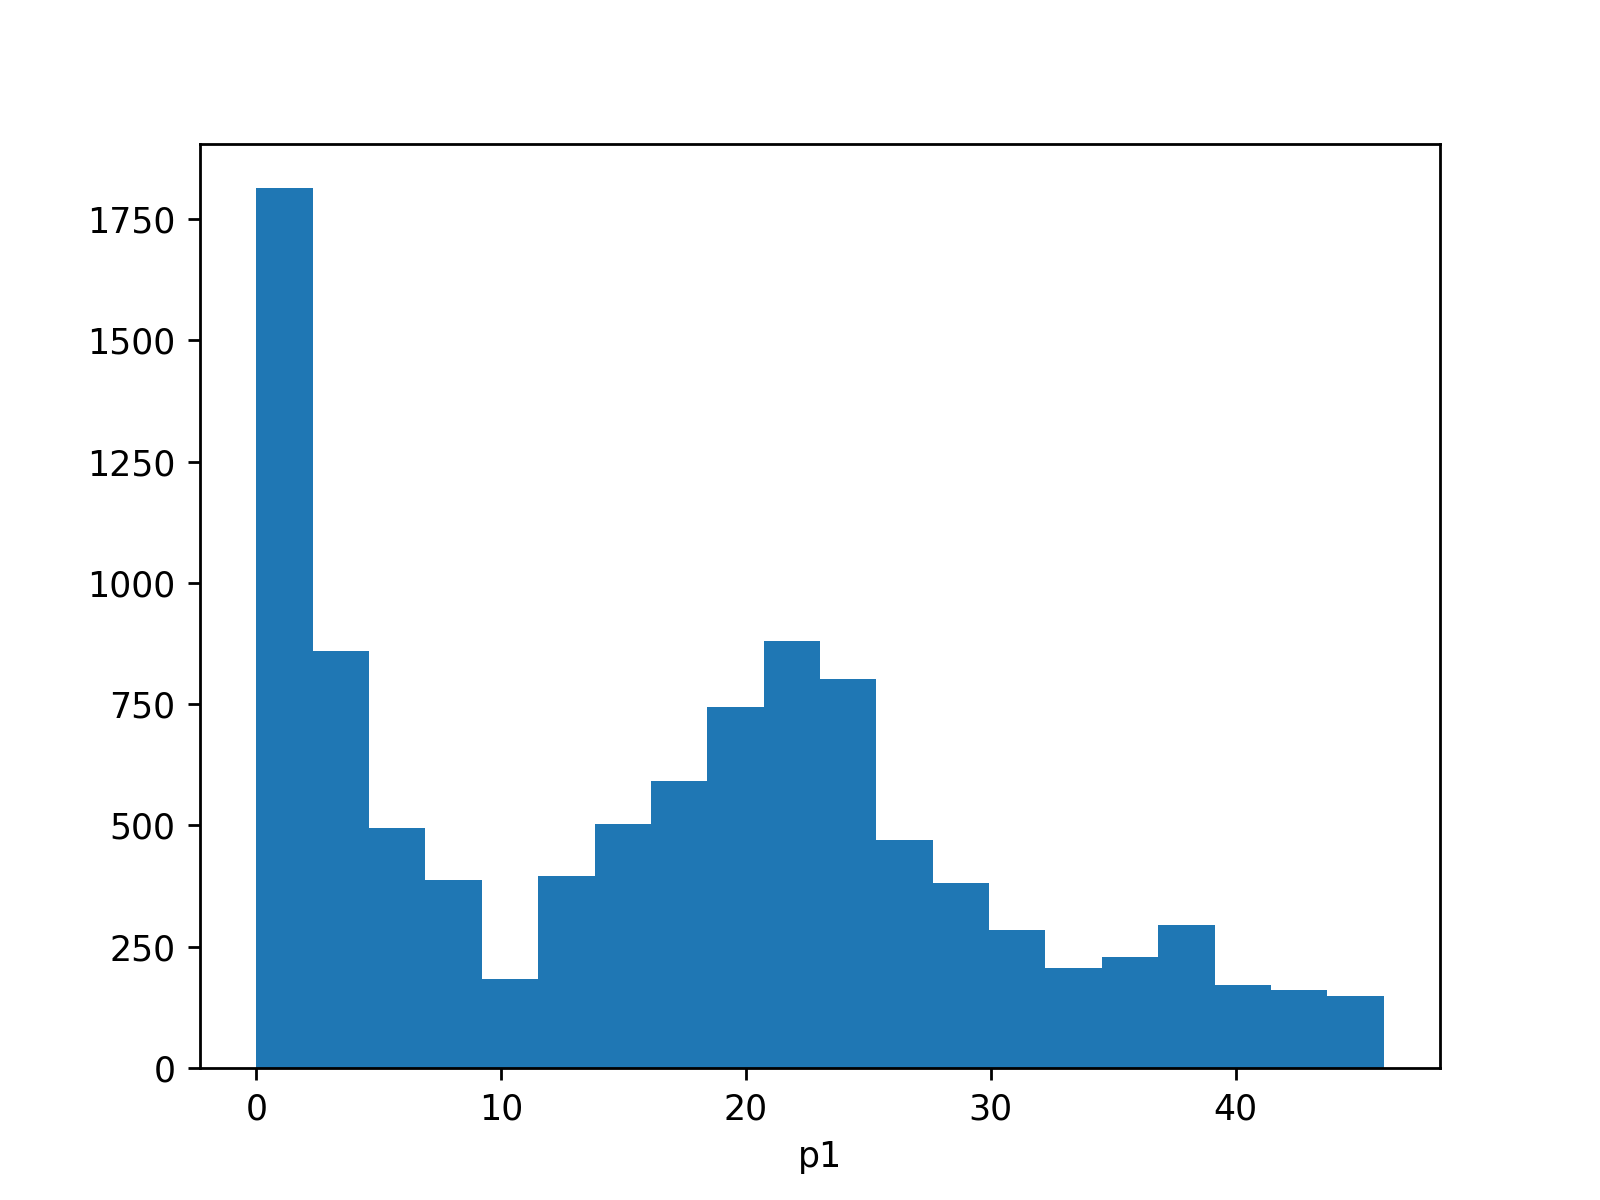

<IPython.core.display.Javascript object>


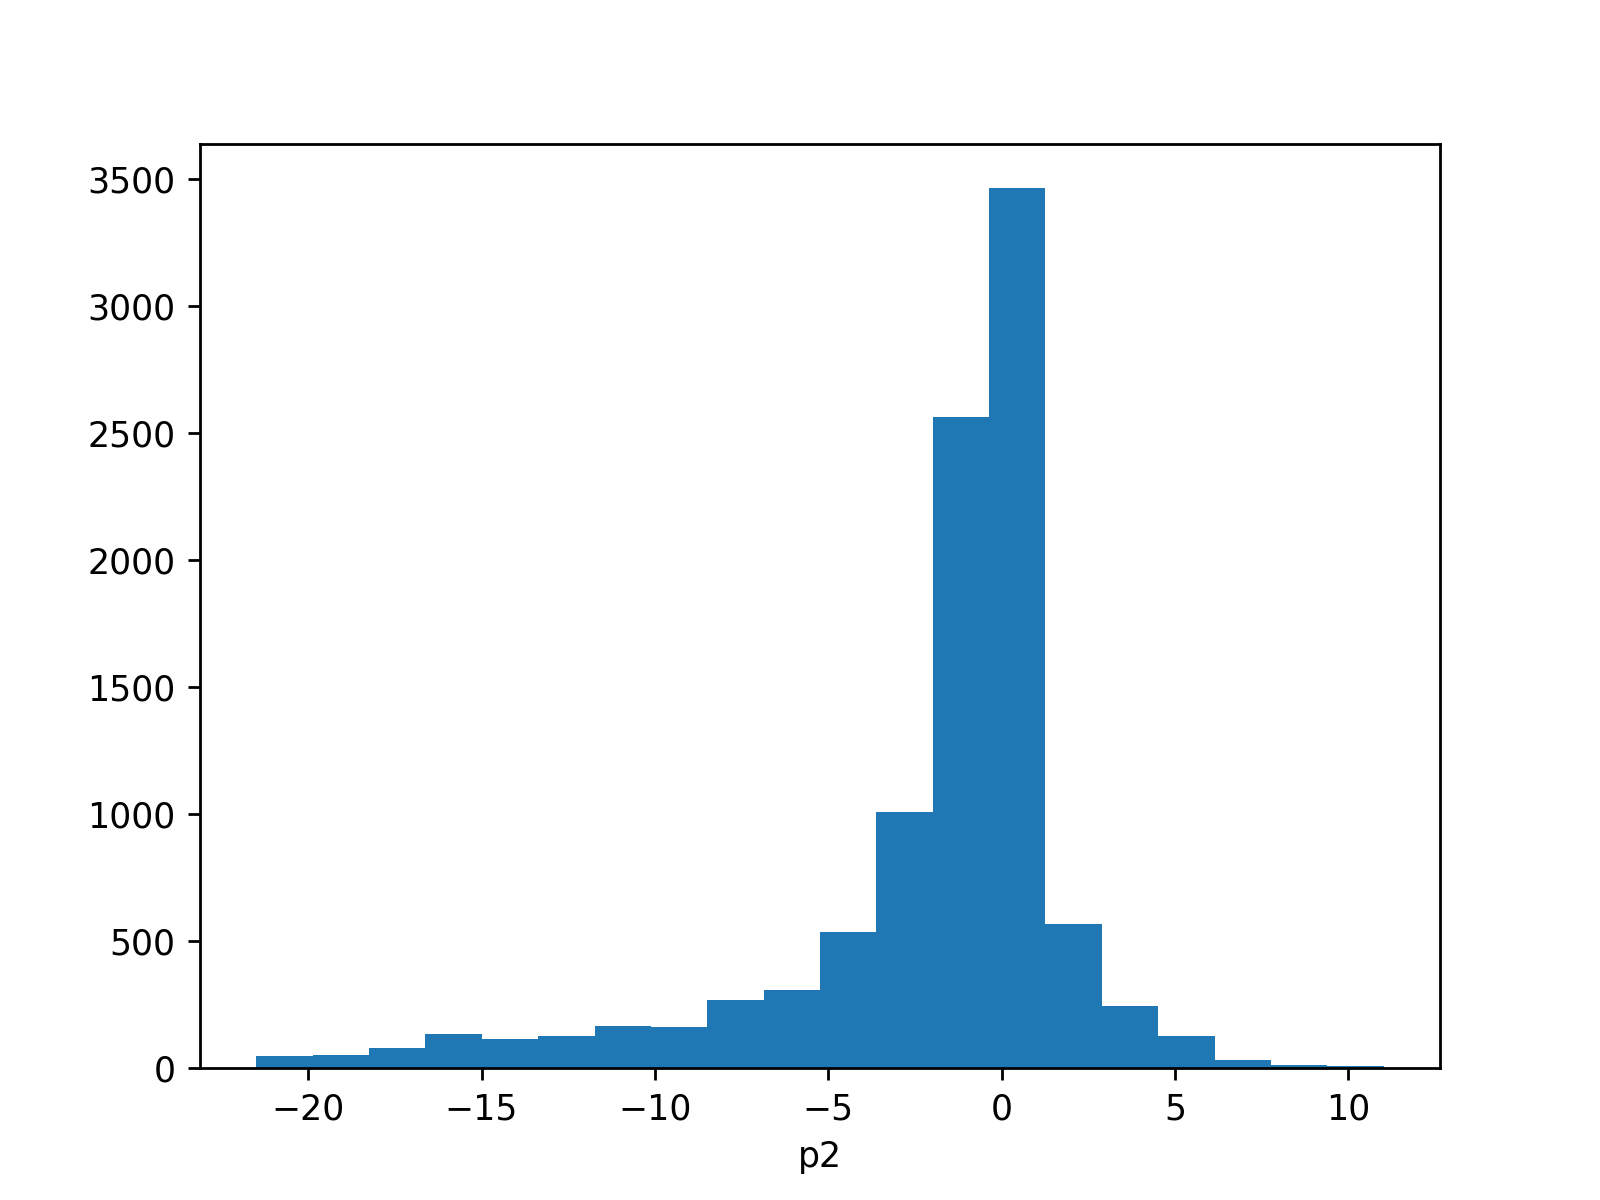

Text(0.5, 0, 'p2')

In [104]:
ps = np.array(par_list)
figp0 = plt.figure("p0")
#plt.figure(2)
plt.hist(ps[:,0], bins=20)
plt.xlabel("p0")

figp1=plt.figure("p1")
plt.hist(ps[:,1], bins=20)
plt.xlabel("p1")

figp2=plt.figure("p2")
plt.hist(ps[:,2], bins=20)
plt.xlabel("p2")